In [1]:
# https://pandas-datareader.readthedocs.io/en/latest/
# https://financedata.github.io/posts/finance-data-reader-users-guide.html

!pip install pandas-datareader
!pip install -U FinanceDataReader


ERROR: Could not find a version that satisfies the requirement FinanceDataReader (from versions: none)
ERROR: No matching distribution found for FinanceDataReader


In [43]:
import numpy as np
import pandas as pd
import tensorflow

from keras.models import Sequential
from keras.layers import Dense ,SimpleRNN, LSTM ,GRU ,TimeDistributed #(다대다 구성에 필요)   

In [44]:
import FinanceDataReader as fdr

df = fdr.DataReader('005930','2000-01-01')
df = df[['Close','High','Volume']].reset_index()
df

,Date,Close,High,Volume
0,2000-01-04,6110,6110,1483967
1,2000-01-05,5580,6060,1493604
2,2000-01-06,5620,5780,1087810
3,2000-01-07,5540,5670,806195
4,2000-01-10,5770,5770,937615
...,...,...,...,...
5663,2022-12-09,60400,60600,10529632
5664,2022-12-12,59500,60000,9036472
5665,2022-12-13,59700,60300,9040873
5666,2022-12-14,60500,60600,8207485


In [45]:
df.drop(columns=["Date"], inplace=True)
df

,Close,High,Volume
0,6110,6110,1483967
1,5580,6060,1493604
2,5620,5780,1087810
3,5540,5670,806195
4,5770,5770,937615
...,...,...,...
5663,60400,60600,10529632
5664,59500,60000,9036472
5665,59700,60300,9040873
5666,60500,60600,8207485


In [46]:
##batch size, seq len, hidden size(=특성 데이터 개수) = (-1,10,3)  
##으로  
##종가 10일을 예측  

In [47]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [48]:
x,y = make_dataset( df[["Close","High","Volume"]], df[["Close"]], 10)
#label이 a인 이유는 결국에 a를 이용해서 a 자기 자신을 예측하고 싶기 때문
#만약 y를 주게되면 8을 가져와버려서 shift해서 가져오면 됨
#window size = shift = 3이라면 y를 그대로 쓸 수 있음

#즉, 여기서 y는 윈도우 사이즈 3일때니까 다른 사이즈로 하고 싶으면 커스터마이징 해서 y를 만들어줘야해서
#a를 사용한 것

In [49]:
x= x.reshape(-1,10,3)
x.shape

(5658, 10, 3)

In [50]:
y.shape

##batch size, seq len, hidden size(=특성 데이터 개수)

(5658, 1)

In [51]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(10,3), return_sequences=True))
model.add(LSTM(30,activation='relu',input_shape=(10,3)))
model.add(Dense(units=3))
model.compile(loss='mse',optimizer='adam')
model.fit(x,y,epochs=1000)

Epoch 1/1000
177/177 [==============================] - 3s 7ms/step - loss: 35826872320.0000
Epoch 2/1000
177/177 [==============================] - 1s 6ms/step - loss: 13965556736.0000
Epoch 3/1000
177/177 [==============================] - 1s 6ms/step - loss: 1492585728.0000
Epoch 4/1000
177/177 [==============================] - 1s 6ms/step - loss: 3632322816.0000
Epoch 5/1000
177/177 [==============================] - 1s 6ms/step - loss: 3235435264.0000
Epoch 6/1000
177/177 [==============================] - 1s 6ms/step - loss: 1035472064.0000
Epoch 7/1000
177/177 [==============================] - 1s 6ms/step - loss: 989464320.0000
Epoch 8/1000
177/177 [==============================] - 1s 6ms/step - loss: 692842816.0000
Epoch 9/1000
177/177 [==============================] - 1s 6ms/step - loss: 593282816.0000
Epoch 10/1000
177/177 [==============================] - 1s 6ms/step - loss: 449337984.0000
Epoch 11/1000
177/177 [==============================] - 1s 6ms/step - loss: 8982

In [52]:
model.predict(x)

177/177 [==============================] - 1s 2ms/step


array([[ 5933.996 ,  5933.947 ,  5934.0537],
       [ 5966.652 ,  5966.6016,  5966.711 ],
       [ 5916.973 ,  5916.924 ,  5917.0303],
       ...,
       [58584.53  , 58583.086 , 58586.242 ],
       [59736.402 , 59734.926 , 59738.145 ],
       [60014.96  , 60013.477 , 60016.715 ]], dtype=float32)

In [ ]:
pred_10 = model.predict(x)[-10:,:]
pred_10_close=[]
for i in range(len(pred_10)):

    pred_10_close.append(pred_10[i][0])
pred_10_close

177/177 [==============================] - 0s 2ms/step


[60887.367,
 60059.27,
 59732.3,
 58153.633,
 59543.453,
 58131.03,
 59808.938,
 58584.53,
 59736.402,
 60014.96]

In [3]:
#
# https://financedata.github.io/posts/finance-data-reader-users-guide.html
#

#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True


In [4]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [6]:
!pip install -U finance-datareader

In [9]:
#  FinanceDataReader requires the followings:
!pip install bs4
!pip install plotly

import FinanceDataReader as fdr
fdr.__version__

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -------------------------------------- - 18.4/19.1 MB 96.7 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 70.9 MB/s eta 0:00:00


'0.9.94'

In [10]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,53000,1,3100,6.21,50300,53300,50300,24634661,1279668899900,316398475150000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,176900,1,3900,2.25,174000,179000,173600,2096124,370764093900,128783618368500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,379000,2,-43000,-10.19,403000,403500,378500,481980,186387402000,88686000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,934000,2,-23000,-2.40,956000,964000,929000,36252,34216544000,66476516000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,204500,1,3000,1.49,200000,205000,199900,253818,51367478100,42825611059500,209416191,STK


In [11]:
len(df_krx)

2849

In [12]:
import FinanceDataReader as fdr

# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


<Axes: xlabel='Date'>

findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font famil

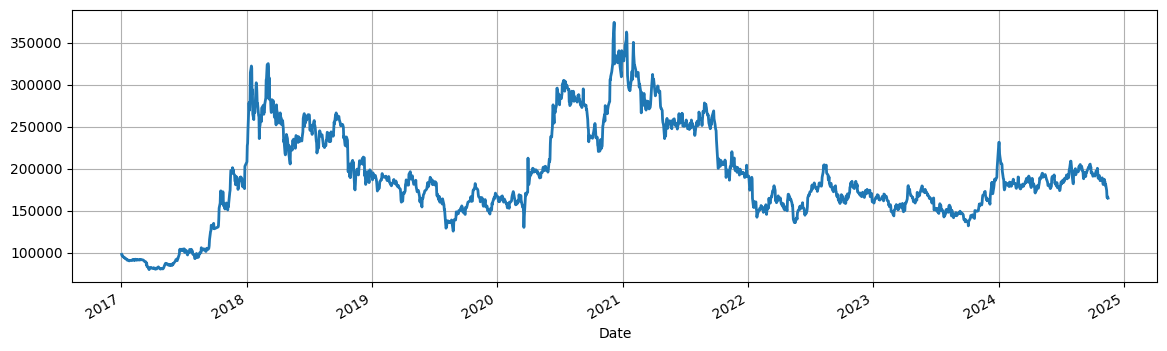

In [13]:
import FinanceDataReader as fdr

# 셀트리온, 2017년~현재

df = fdr.DataReader('068270', '2017')
df['Close'].plot()

<Axes: >

findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font famil

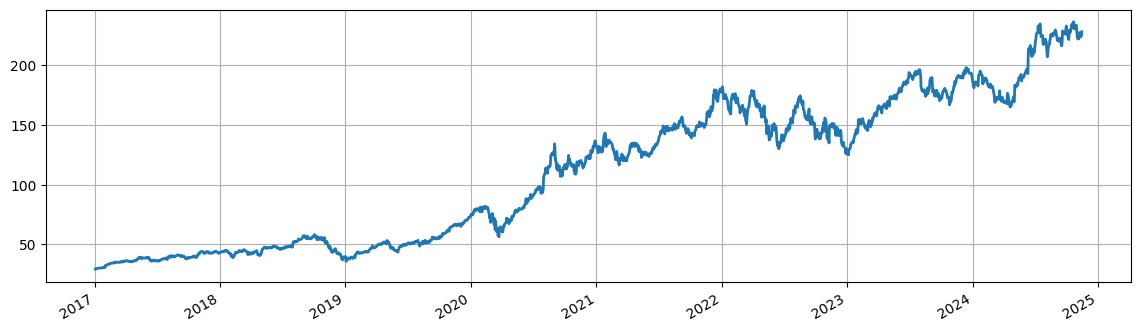

In [14]:
import FinanceDataReader as fdr

# 애플(AAPL), 2017년
df = fdr.DataReader('AAPL', '2017')
df['Close'].plot()

<Axes: >

findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font famil

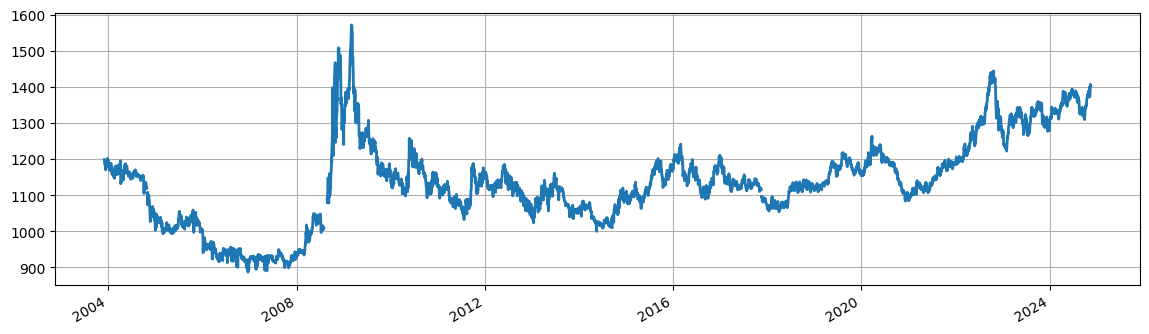

In [15]:
import FinanceDataReader as fdr

# 원달러 환율, 1995년~현재
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

<Axes: >

findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font family 'nanummyeongjo' not found.
findfont: Font famil

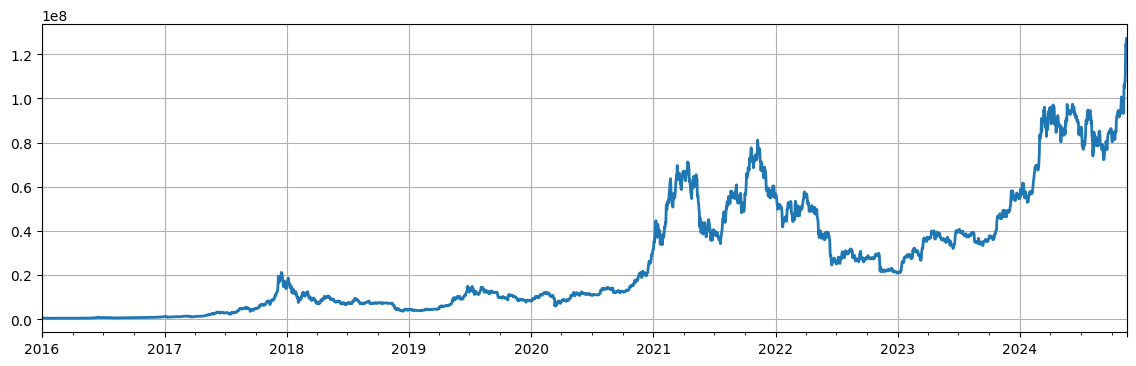

In [16]:
import FinanceDataReader as fdr

# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()

In [18]:
import FinanceDataReader as fdr

# 비트코인 원화 가격 (빗썸), 2016년~현재
df = fdr.DataReader('CFX/KRW', '2024')
df['Close'].plot()

HTTPError: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v8/finance/chart/CFX/KRW?period1=1704034800&period2=1731639241&interval=1d&includeAdjustedClose=true